In [1]:
import os
import numpy as np

from dusty import util as U
from dusty import data as D

In [2]:
import corner as DFM
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
# get data
NH = D.Nihao()

zred = 0.022229

filters = U.lsst()
maggies = NH.maggies(zred, filters=filters, dust=True)
maggies_nodust = NH.maggies(zred, filters=filters, dust=False)

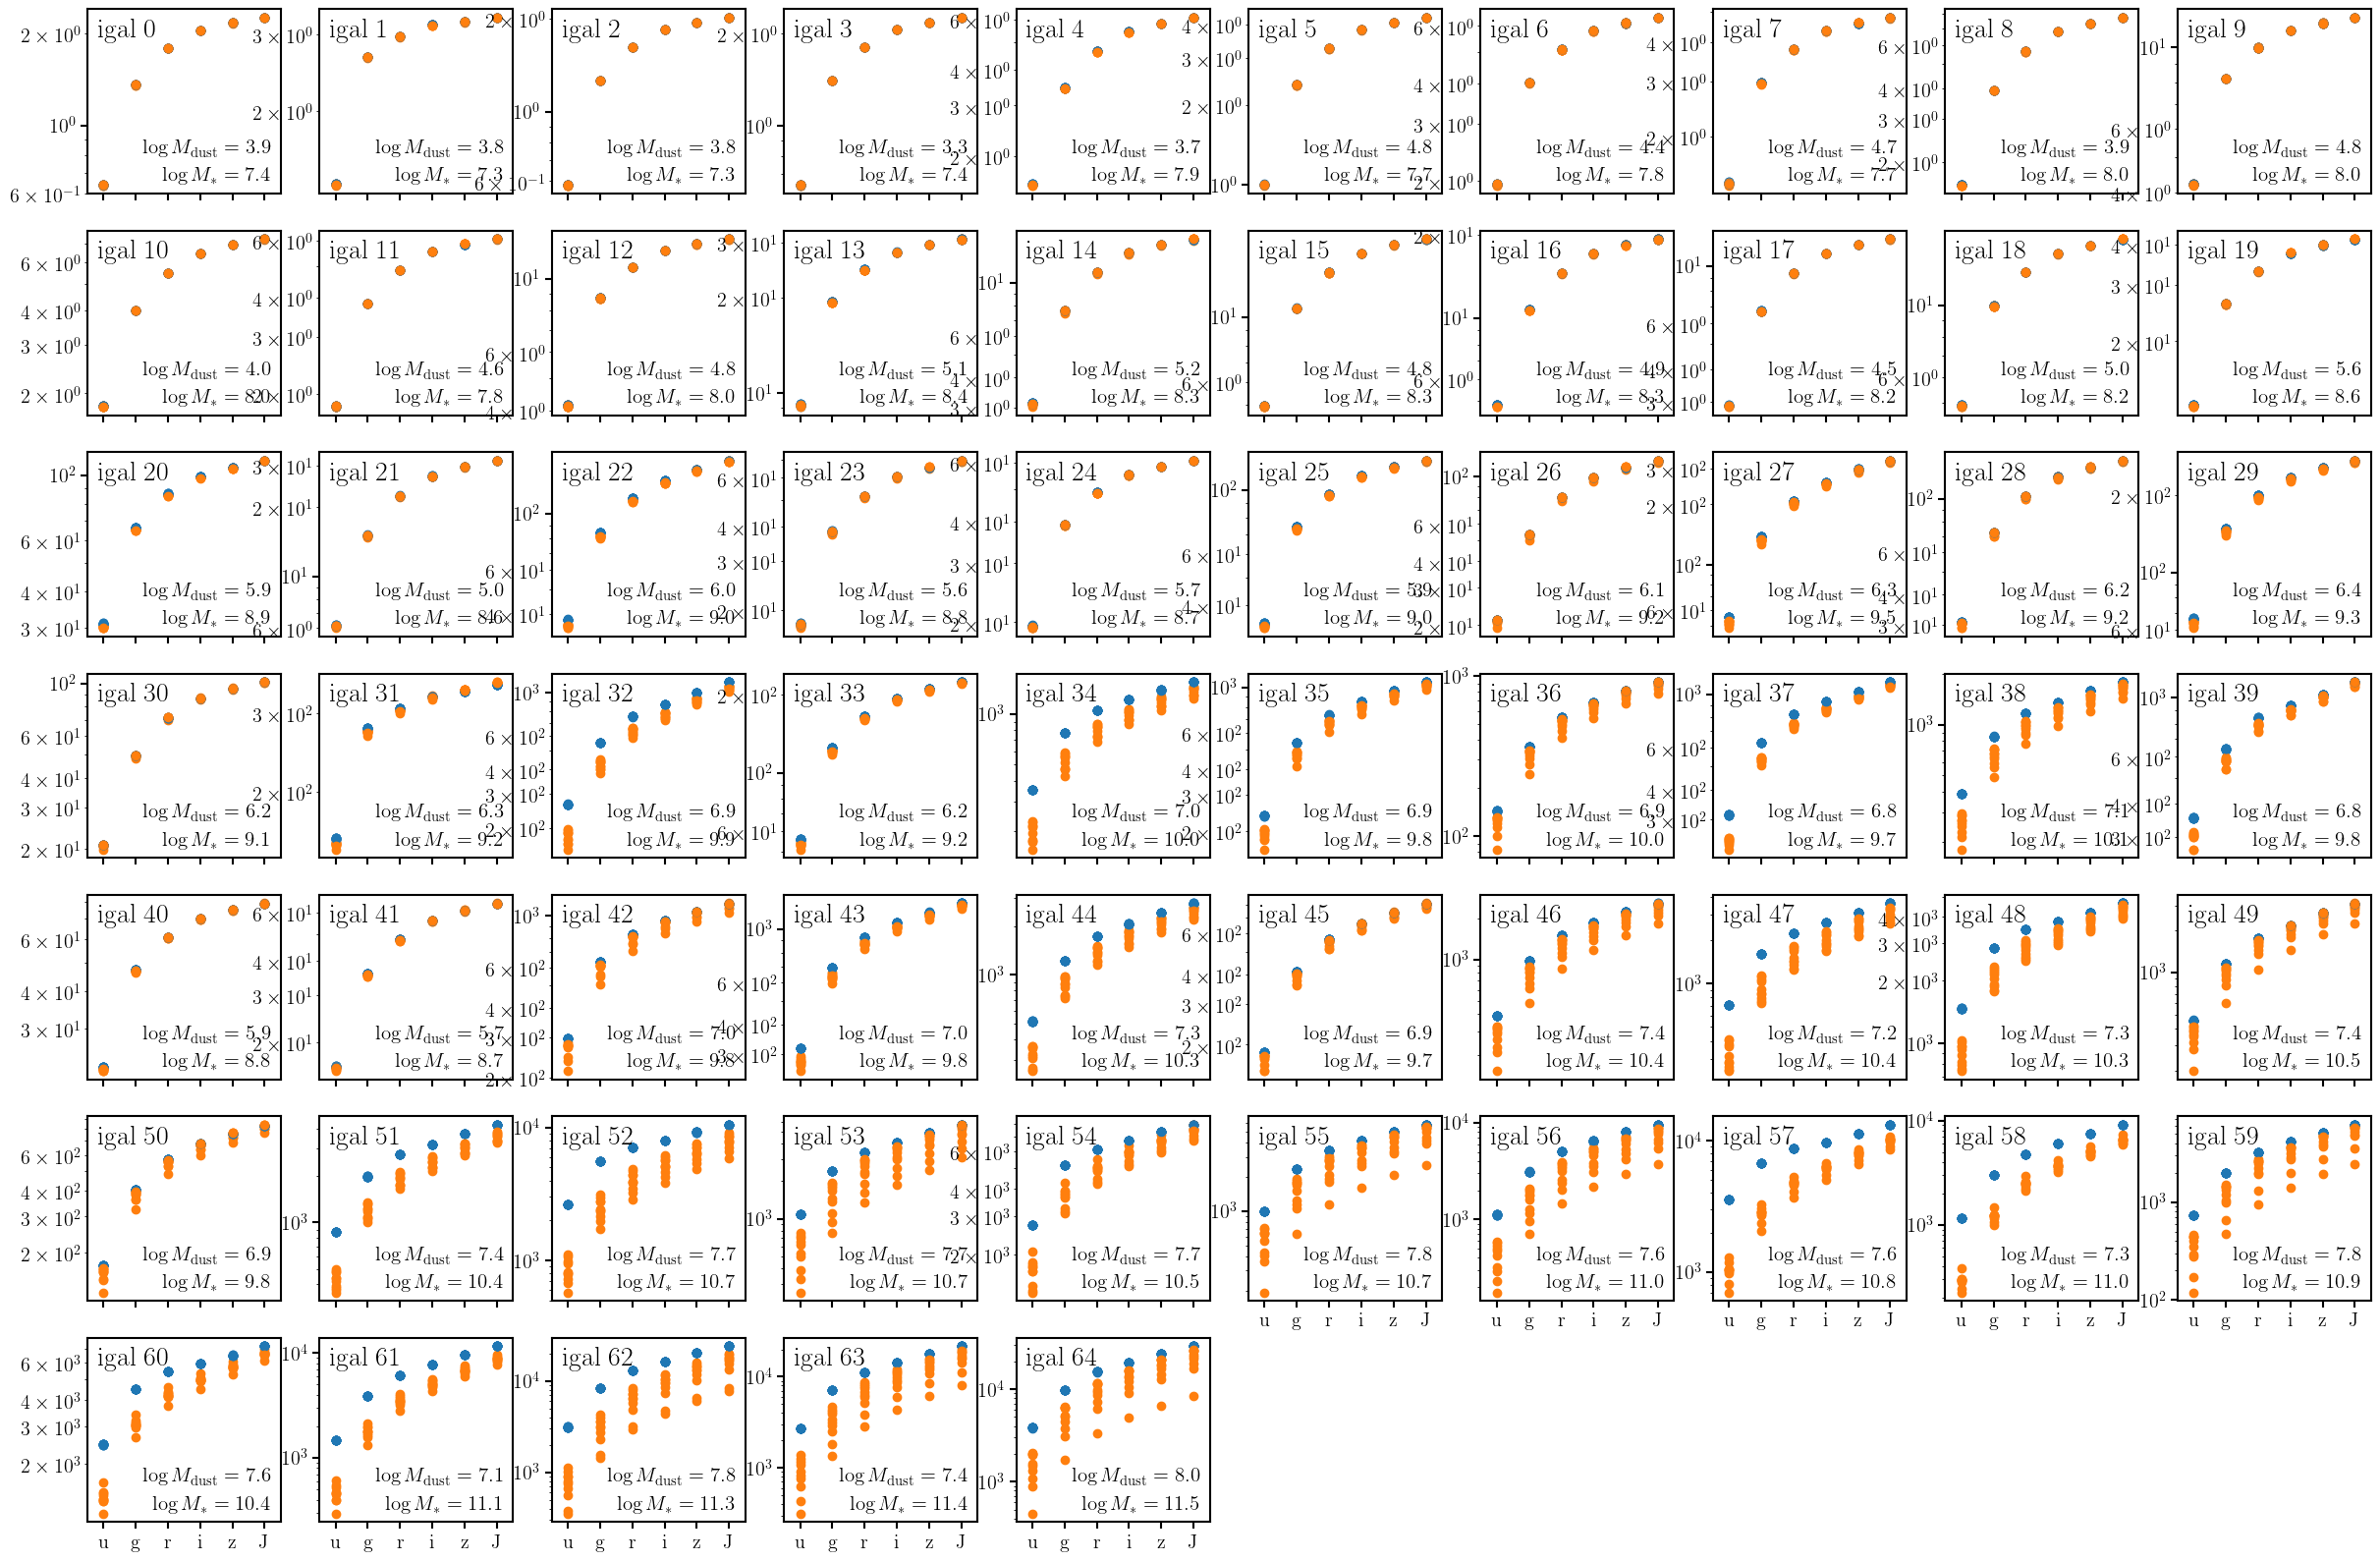

In [4]:
fig = plt.figure(figsize=(30,20))
for igal in range(65): 
    sub = fig.add_subplot(7, 10, igal+1)
    
    for ii in range(10): 
        sub.scatter(range(6), maggies_nodust[10*igal+ii], c='C0')
        sub.scatter(range(6), maggies[10*igal+ii], c='C1')
    
    sub.text(0.05, 0.95, 'igal %i' % igal, transform=sub.transAxes, ha='left', va='top', fontsize=20)
    sub.text(0.95, 0.05, r'$\log M_* = %.1f$' % np.log10(NH.prop['stellar_mass'])[10*igal], 
             transform=sub.transAxes, ha='right', va='bottom', fontsize=15)
    sub.text(0.95, 0.20, r'$\log M_{\rm dust} = %.1f$' % np.log10(NH.prop['dust_mass'])[10*igal], 
             transform=sub.transAxes, ha='right', va='bottom', fontsize=15)
    
    sub.set_xticks(np.arange(6))
    if igal < 55: sub.set_xticklabels([])
    else: sub.set_xticklabels(['u', 'g', 'r', 'i', 'z', 'J'])
    sub.set_xlim(-0.5, 5.5)
    sub.set_yscale('log')
    
plt.show()

# apply noise
We'll use noise levels from Figure 1 of [Graham et al. (2018)](https://iopscience.iop.org/article/10.3847/1538-3881/aa99d4/pdf)

In [8]:
mag_arr_u = np.array([21.000535514065614, 21.787138737190894, 22.396252517195023, 22.942008289311474, 23.55145676560661,  24.07224419441392,  24.68269675958208,  25.34549582466377,  26.124702259757793])
sig_mag_u = np.array([0.008311345646437929, 0.010422163588390432, 0.014116094986807326, 0.018865435356200444, 0.027836411609498624, 0.03891820580474925, 0.06372031662269123, 0.1138522427440633, 0.19934036939313982])

mag_arr_g = np.array([21.013053155349287, 21.774219460358015, 22.852543970725232, 23.62659608293774,  24.36272710537913,  25.188188567890354, 25.87488494814997,  26.511611172162194, 26.983733760257046, 27.40471475508599])
sig_mag_g = np.array([0.005672823218997314, 0.0067282321899735376, 0.008311345646437929, 0.012532981530342935, 0.018865435356200444, 0.03364116094986802, 0.060554089709762504, 0.09960422163588387, 0.1434036939313984, 0.1808707124010554])

mag_arr_r = np.array([21.013053155349287, 22.002515800454074, 23.004730374246236, 24.007112296183905, 24.946504376154007, 25.74706443461429,  26.268521256003616])
sig_mag_r = np.array([0.005672823218997314, 0.006200527704485426,  0.007783641160949817,  0.012005277044854823,  0.023087071240105506,  0.045250659630606815,  0.06688654353562001])

mag_arr_i = np.array([21.013053155349287, 22.002549270083172, 22.624214161000076, 23.157151065170947, 23.829823670837357, 24.210741519632727, 24.579074787886228, 24.998549649405636])
sig_mag_i = np.array([0.005672823218997314, 0.0067282321899735376, 0.008311345646437929, 0.0109498680738786, 0.01675461741424794, 0.022559366754617338, 0.029947229551451127, 0.043667546174142424])

mag_arr_z = np.array([21.02573814477846,  21.634684576637085, 22.26903445698316,  22.916270144533016, 23.728912739098664, 24.339064077604917, 24.80981441090664,  25.319489922852505])
sig_mag_z = np.array([0.005672823218997314, 0.0067282321899735376, 0.008311345646437929, 0.013060686015831102, 0.02572559366754612, 0.04577836411609493, 0.06794195250659626, 0.1038258575197889])

mag_arr_y = np.array([21.01322050349479,  21.520854368065514, 22.193694321877423, 22.701796761255558, 23.210300836182903, 23.770448548812666, 24.26804152465317,  24.893555422916656])
sig_mag_y = np.array([0.008311345646437929, 0.012005277044854823, 0.020448548812664835, 0.03153034300791552, 0.04894459102902371, 0.08060686015831131, 0.1259894459102902, 0.18825857519788916])

noise_mag = [mag_arr_u, mag_arr_g, mag_arr_r, mag_arr_i, mag_arr_z, mag_arr_y]
noise_sig = [sig_mag_u, sig_mag_g, sig_mag_r, sig_mag_i, sig_mag_z, sig_mag_y]

In [14]:
def mag2flux(mag): 
    ''' convert magnitudes to flux in nanomaggies
    '''
    return 10**(0.4 * (22.5 - mag)) 

def sigma_mag2flux(sigma_mag, mag): 
    ''' convert sigma_mag to sigma_flux
    '''
    flux = mag2flux(mag)
    return np.abs(flux) * np.abs(-0.4 * np.log(10) * sigma_mag)

In [29]:
maggies_noise, maggies_nodust_noise = [], [] 
sig_maggies, sig_maggies_nodust = [], []
for igal in range(65): 
    for iang in range(10): 
        mag = 22.5 - 2.5 * np.log10(maggies[10*igal+iang])
        mag_nodust = 22.5 - 2.5 * np.log10(maggies_nodust[10*igal+iang])

        sig_mag, sig_mag_nodust = [], []
        for i in range(6): 
            sig_mag.append(np.interp(mag[i], noise_mag[i], noise_sig[i]))
            sig_mag_nodust.append(np.interp(mag_nodust[i], noise_mag[i], noise_sig[i]))
        sig_mag = np.array(sig_mag)
        sig_mag_nodust = np.array(sig_mag_nodust)
                
        sig_maggies.append(sigma_mag2flux(sig_mag, mag))
        sig_maggies_nodust.append(sigma_mag2flux(sig_mag_nodust, mag_nodust))
    
        maggies_noise.append(maggies[10*igal+iang] + sig_maggies[-1])
        maggies_nodust_noise.append(maggies_nodust[10*igal+iang] + sig_maggies_nodust[-1]) 

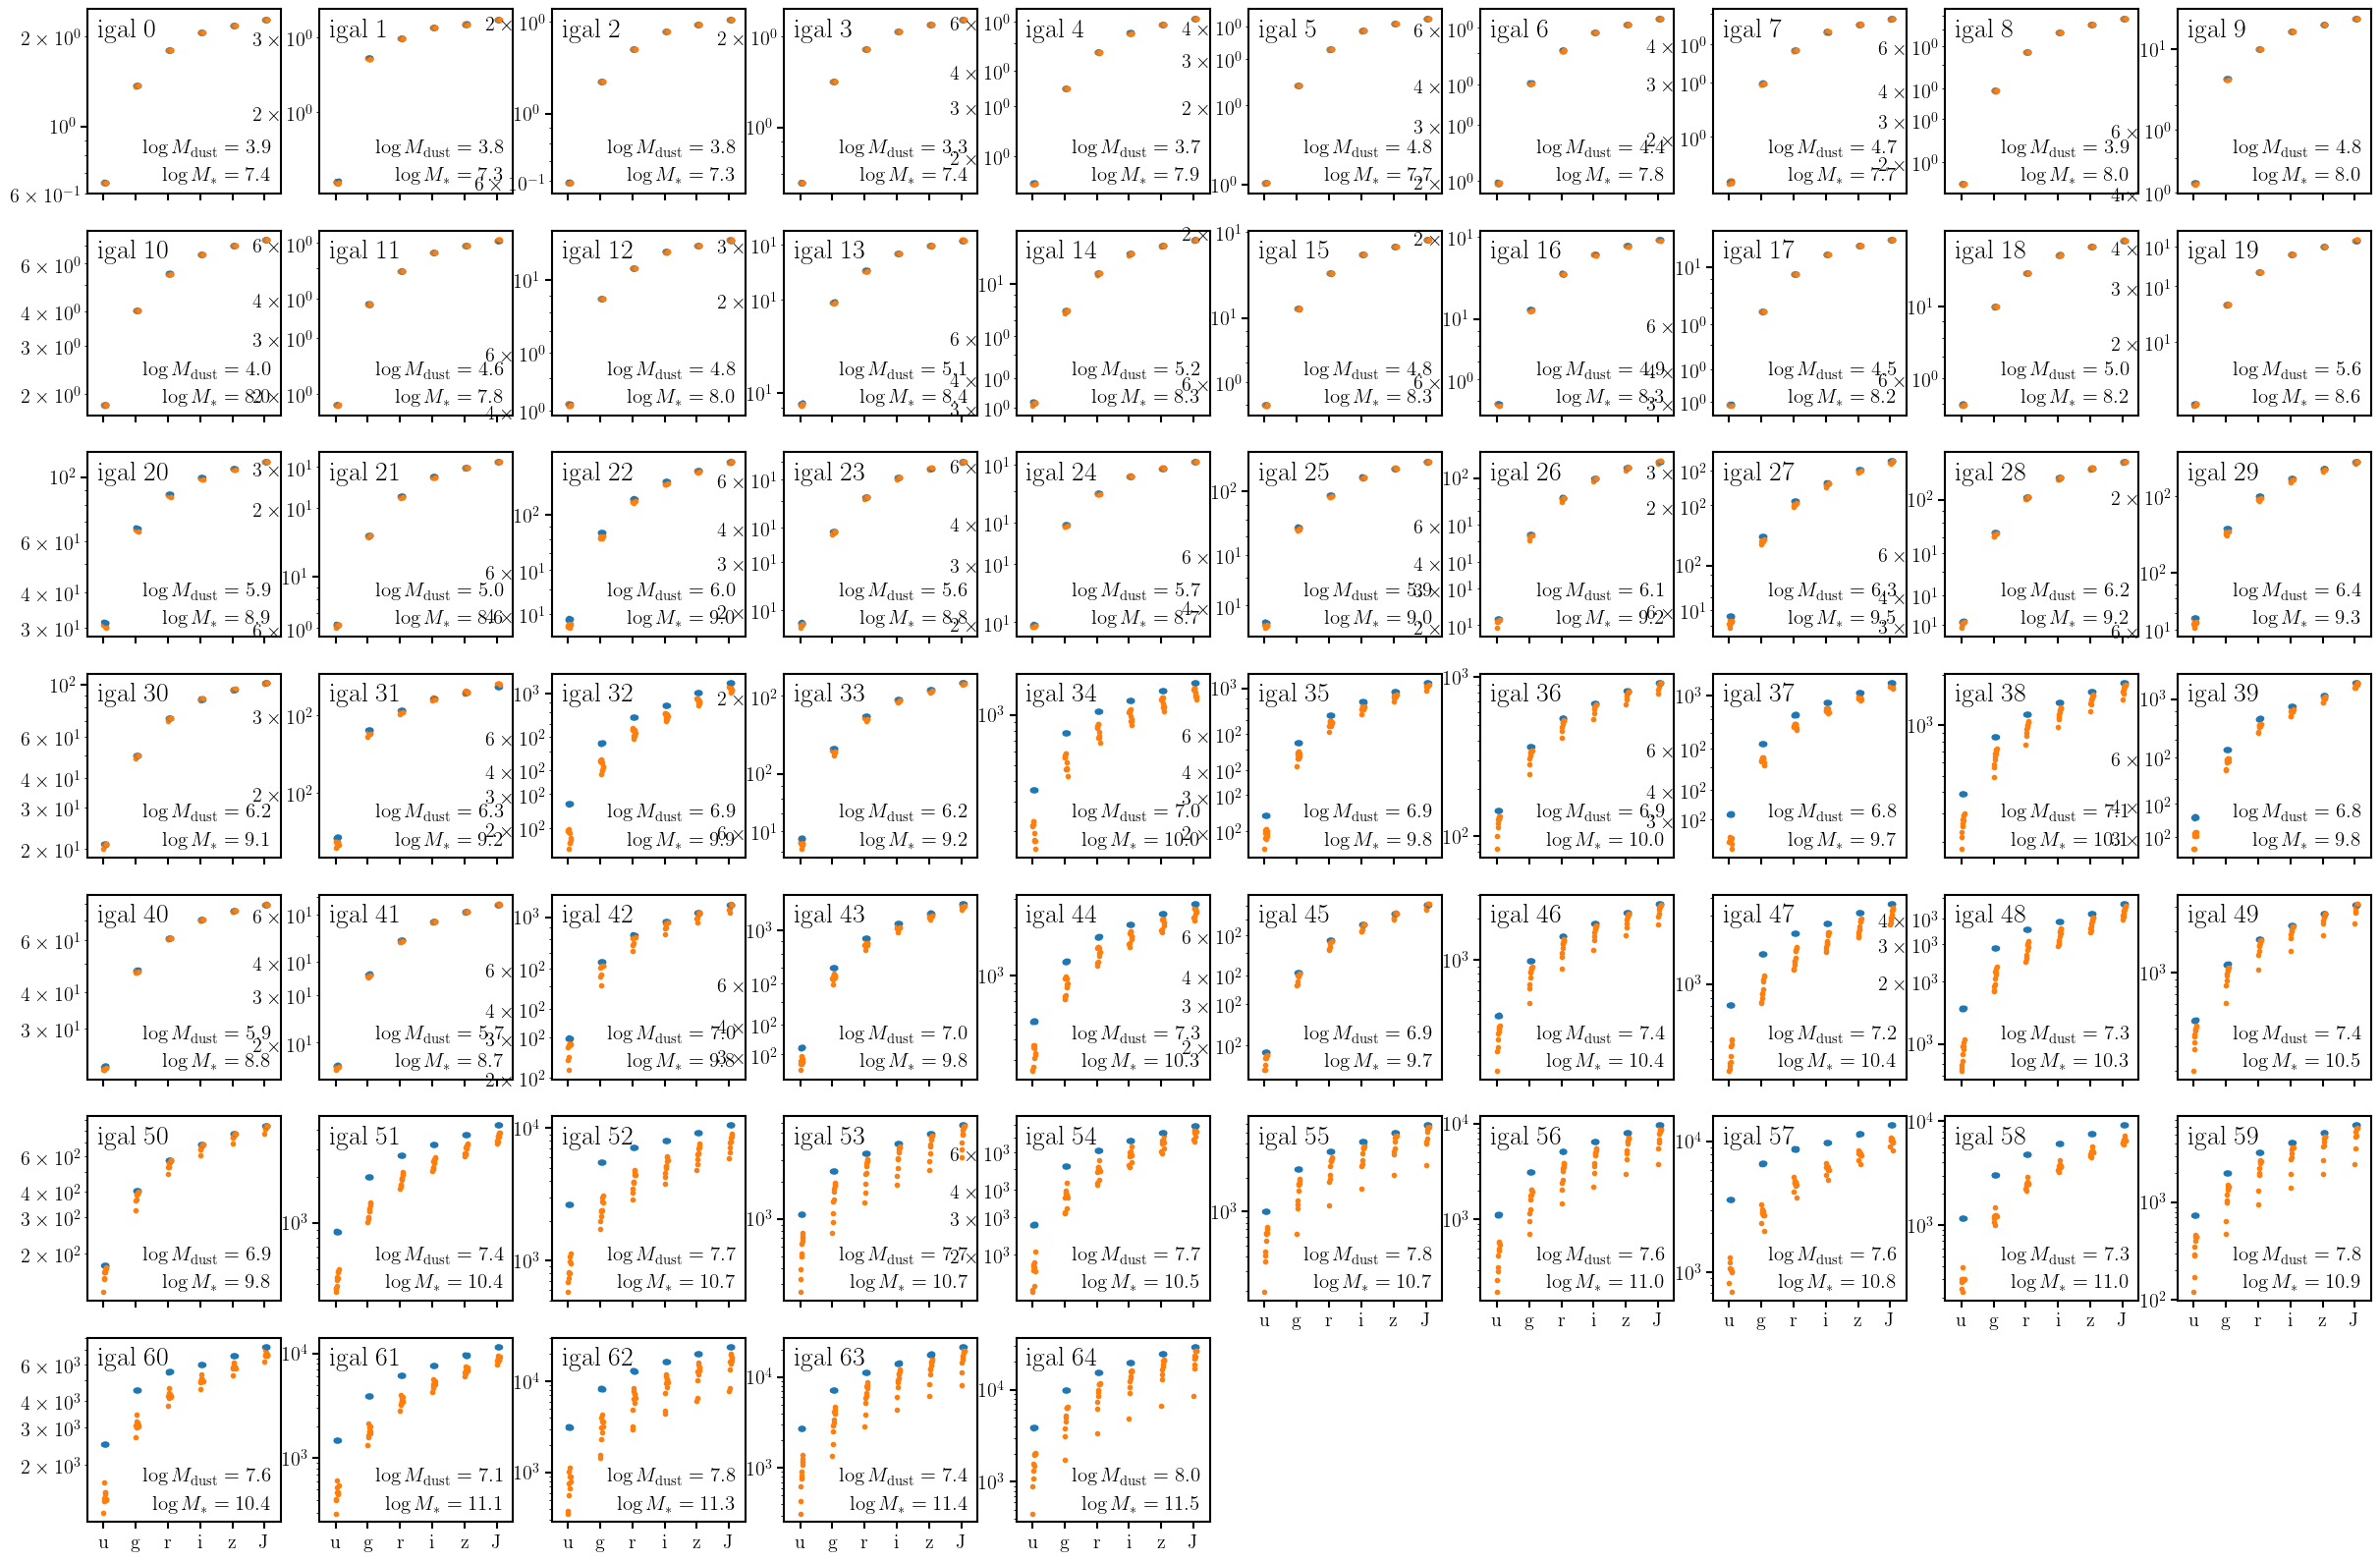

In [31]:
fig = plt.figure(figsize=(30,20))
for igal in range(65): 
    sub = fig.add_subplot(7, 10, igal+1)
    
    for ii in range(10): 
        sub.errorbar(ii*0.01+np.arange(6), maggies_nodust_noise[10*igal+ii], yerr=sig_maggies_nodust[10*igal+ii], fmt='.C0')
        sub.errorbar(ii*0.01+np.arange(6), maggies_noise[10*igal+ii], yerr=sig_maggies[10*igal+ii], fmt='.C1')
    
    sub.text(0.05, 0.95, 'igal %i' % igal, transform=sub.transAxes, ha='left', va='top', fontsize=20)
    sub.text(0.95, 0.05, r'$\log M_* = %.1f$' % np.log10(NH.prop['stellar_mass'])[10*igal], 
             transform=sub.transAxes, ha='right', va='bottom', fontsize=15)
    sub.text(0.95, 0.20, r'$\log M_{\rm dust} = %.1f$' % np.log10(NH.prop['dust_mass'])[10*igal], 
             transform=sub.transAxes, ha='right', va='bottom', fontsize=15)
    
    sub.set_xticks(np.arange(6))
    if igal < 55: sub.set_xticklabels([])
    else: sub.set_xticklabels(['u', 'g', 'r', 'i', 'z', 'J'])
    sub.set_xlim(-0.5, 5.5)
    sub.set_yscale('log')
    
plt.show()

In [39]:
np.save('/scratch/gpfs/chhahn/dusty/nihao_maggies_noisy.npy', maggies_noise)
np.save('/scratch/gpfs/chhahn/dusty/nihao_maggies_nodust_noisy.npy', maggies_nodust_noise)
np.save('/scratch/gpfs/chhahn/dusty/nihao_sig_maggies.npy', sig_maggies)
np.save('/scratch/gpfs/chhahn/dusty/nihao_sig_maggies_nodust.npy', sig_maggies_nodust)